In [12]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D


In [5]:
## Load the MNIST dataset
(train_images, train_Labels), (test_images, test_Labels) = mnist.load_data()

11490434/11490434 [==============================] - 49s 4us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
#normalizing the data
train_images = train_images / 255
test_images = test_images / 255



In [9]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

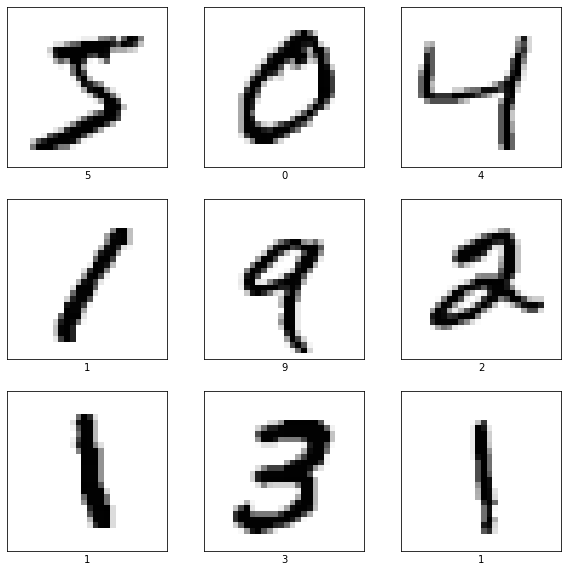

In [10]:
#visualizing the data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_Labels[i]])

In [13]:
#making the model 
num_filters = 8
filter_size = 3
pool_size = 2
model = Sequential([
    Conv2D(num_filters, filter_size, activation='relu', input_shape=(28, 28, 1)), #input layer
    MaxPooling2D(pool_size), #pooling layer
    Flatten(), #flattening layer
    Dense(128, activation='relu'), #hidden layer
    Dropout(0.2), #dropout layer
    Dense(10, activation='softmax') #output layer
])


model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 1352)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               173184    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [14]:
#compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_images,train_Labels, epochs=10, validation_data=(test_images, test_Labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0418 - val_accuracy: 0.9886
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0543 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0112 - accuracy: 0.9959 - val_loss: 0.0414 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0501 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.0505 - val_accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.0454 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0502 - val_acc

313/313 - 1s - loss: 0.0516 - accuracy: 0.9878 - 548ms/epoch - 2ms/step

Test accuracy: 0.9878000020980835


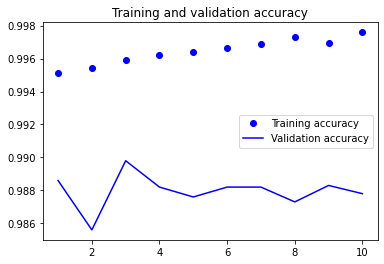

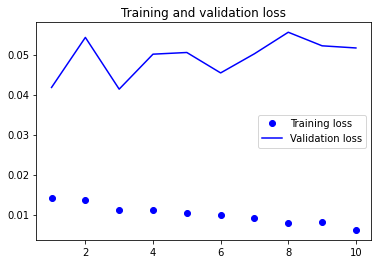

In [19]:
#evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_Labels, verbose=2)
print('\nTest accuracy:', test_acc)
#plotting the accuracy and loss of the model
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy') #'bo' is the color of the line
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [20]:
model.save('ocr.h5')

C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
out = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [24]:
num = int(input("Please enter the number of the image you want to test: ")) #taking input from the user


m = -1000
o2 = out[num]
ind = -1

for i in range(len(o2)):
    if o2[i] > m:
        m = o2[i]
        ind = i
print("The predicted class is: ", class_names[ind]) #printing the predicted class
print("The real answer is : ", class_names[test_Labels[num]]) #printing the real answer

The predicted class is:  1
The real answer is :  1
